## LIBRARY and Path

In [48]:
import rasterio
from rasterio.crs import CRS
from rasterio.warp import calculate_default_transform, reproject, Resampling
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import shapefile
from pyproj import Transformer
from shapely.geometry import Polygon
import os
from rasterio.mask import mask
from rasterio.windows import from_bounds
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pandas as pd

# PATH
folder="Dataset\SPI03"
file_path=folder+'\\'+"SPI03_2022_12.asc"

<>:19: SyntaxWarning: invalid escape sequence '\S'
<>:19: SyntaxWarning: invalid escape sequence '\S'
C:\Users\MacGy\AppData\Local\Temp\ipykernel_9544\1605280993.py:19: SyntaxWarning: invalid escape sequence '\S'
  folder="Dataset\SPI03"


## SPI3 ITALY MAP in 2022-12

Dimensioni del dataset: 1300 x 1400
Estensione spaziale (bounds): BoundingBox(left=3900000.0, bottom=1300000.0, right=5200000.0, top=2700000.0)
Sistema di riferimento (CRS): None


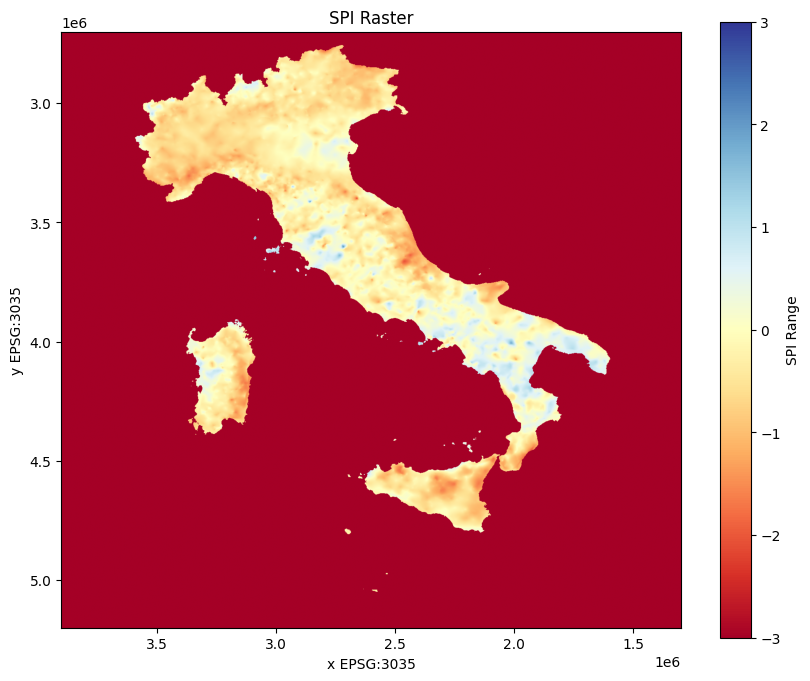

In [ ]:
# Read the .asc file using rasterio
with rasterio.open(file_path) as src:
    dataset = src.read(1)  # Extract the first layer (band)
    bounds = src.bounds
    
    width = src.width
    height = src.height
    crs = src.crs  # Spatial reference system
    transform = src.transform  # Transformation information
    
    print("Dataset dimensions:", width, "x", height)
    print("Spatial extent (bounds):", bounds)
    print("Reference system (CRS):", crs)

# Set the color range
vmin = -3  # Minimum value
vmax = 3   # Maximum value

# Create a custom colormap
# You can choose an existing colormap or create a custom one
cmap = plt.get_cmap('RdYlBu')  # Colormap from red to blue

# Create the image
plt.figure(figsize=(10, 8))
plt.imshow(
    dataset,
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    extent=(bbox[0], bbox[1], bbox[2], bbox[3])
)  # Apply vmin and vmax
plt.colorbar(label='SPI Range')  # Add a colorbar
plt.title('SPI Raster')
plt.xlabel('x EPSG:3035')
plt.ylabel('y EPSG:3035')

# Display the image
plt.show()


## ZOOM in SAN BENEDETTO AREA

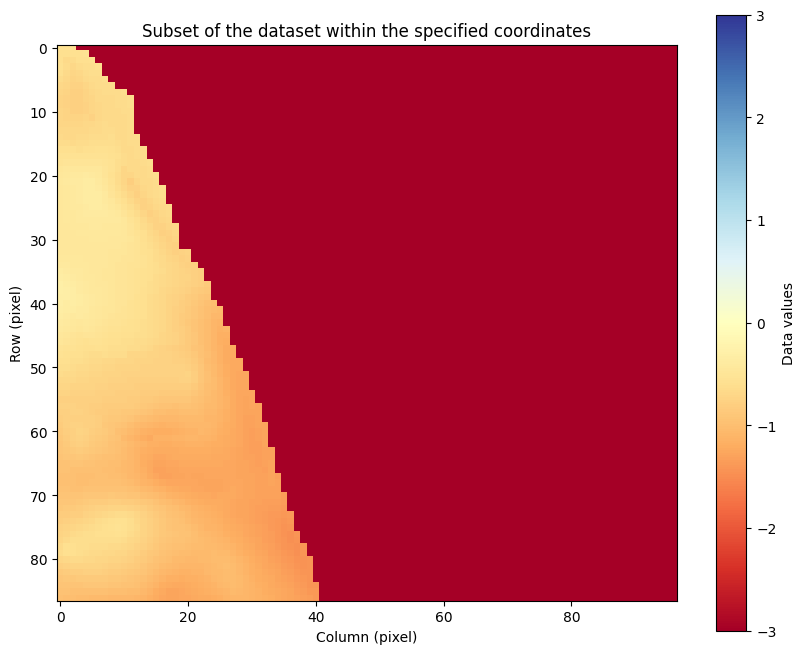

In [35]:
# Read the .asc file using rasterio
with rasterio.open(file_path) as src:
    dataset = src.read(1)  # Extract the first layer (band)
    transform = src.transform  # Get the affine transform
    bounds = src.bounds  # Get the spatial bounds

# Specified coordinates
y_min, y_max = 2200000.0, 2287000.0
x_min, x_max = 4603000.0, 4700000.0

# Coordinates of the corner of the cone: X 4603000.0 Y 2287000.0
# On the PC: 2399154 4830861

# Compute the indices corresponding to the coordinates
row_min = -int((bounds.top - y_max) / transform[4])  # Transformation to obtain the row index
row_max = -int((bounds.top - y_min) / transform[4])  # Transformation to obtain the row index
col_min = int((x_min - bounds.left) / transform[0])  # Transformation to obtain the column index
col_max = int((x_max - bounds.left) / transform[0])  # Transformation to obtain the column index

# Extract the portion of the dataset of interest
extracted_data = dataset[row_min:row_max, col_min:col_max]

# Display the extracted portion
plt.figure(figsize=(10, 8))
plt.imshow(extracted_data, cmap=cmap, vmin=vmin, vmax=vmax)  # Use the colormap and set min/max values
plt.colorbar(label='Data values')
plt.title('Subset of the dataset within the specified coordinates')
plt.xlabel('Column (pixel)')
plt.ylabel('Row (pixel)')

# Show the image
plt.show()


## IMPORT SHAPEFILE FOR BASIN AREA

Polygon coordinates:
Lat: 2209507.3835356813, Lon: 4638047.787428147
Lat: 2209506.172380414, Lon: 4638074.555696164
Lat: 2209515.9158506566, Lon: 4638111.018976437
Lat: 2209525.755512938, Lon: 4638148.963746101
Lat: 2209534.828476584, Lon: 4638175.096601264
Lat: 2209547.690634203, Lon: 4638214.33200165
Lat: 2209566.9160900847, Lon: 4638260.591306408
Lat: 2209573.9151543076, Lon: 4638300.199008919
Lat: 2209581.5748880785, Lon: 4638350.137736413
Lat: 2209593.176022016, Lon: 4638392.425905816
Lat: 2209591.858909427, Lon: 4638417.713288777
Lat: 2209588.0944436397, Lon: 4638450.568967686
Lat: 2209580.721189905, Lon: 4638473.255680103
Lat: 2209570.6896254728, Lon: 4638500.568954496
Lat: 2209557.741096721, Lon: 4638528.062466399
Lat: 2209546.149913731, Lon: 4638553.984677775
Lat: 2209537.591154774, Lon: 4638581.196909948
Lat: 2209515.0099578802, Lon: 4638619.667525461
Lat: 2209506.652888425, Lon: 4638649.832127147
Lat: 2209488.9709417564, Lon: 4638695.40707252
Lat: 2209472.071875312, Lon: 463

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
C:\Users\MacGy\AppData\Local\Temp\ipykernel_9544\2898044502.py:2: SyntaxWarning: invalid escape sequence '\B'
  sf = shapefile.Reader("Dataset\Bacino.shp")


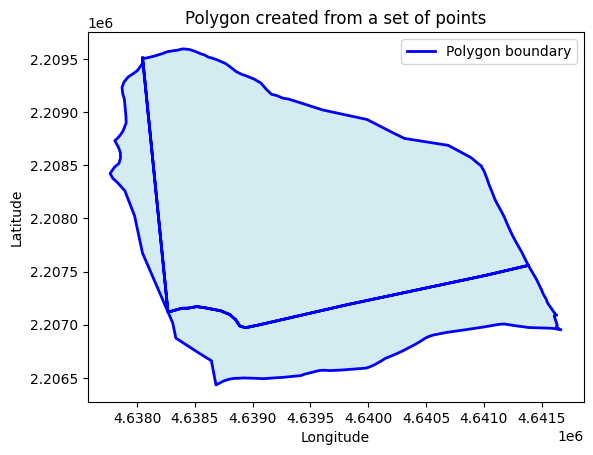

In [37]:

# Load the Shapefile
sf = shapefile.Reader("Dataset\Bacino.shp")
transformer = Transformer.from_crs("EPSG:3004", "EPSG:3035", always_xy=True)
# transformer = Transformer.from_crs("EPSG:3004", "EPSG:4326", always_xy=True)

Points = []

# Extract the coordinates of each polygon
for shape in sf.shapes():
    if shape.shapeType == shapefile.POLYGON:
        print("Polygon coordinates:")
        for point in shape.points:
            # print(point[0], point[1])
            lon, lat = transformer.transform(point[0], point[1])
            Points.append((lon, lat))
            print(f"Lat: {lat}, Lon: {lon}")

polygon = Polygon(Points)

x, y = polygon.exterior.xy

# Draw the polygon using Matplotlib
fig, ax = plt.subplots()
ax.plot(x, y, color='blue', linewidth=2, label="Polygon boundary")  # Draw the boundary
ax.fill(x, y, color='lightblue', alpha=0.5)  # Fill the polygon with a color

# Customize the plot
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Polygon created from a set of points")
plt.legend()
plt.show()





## CHECK INDEX OF POINT INSIDE THE SHAPE

In [46]:

xmin=1300000
ymin=3900000
xmax=2700000
ymax=5200000
for i in range(700,750,1):
    for j in range(450,550,1):
        point=(ymin+1300000/1299*i,xmax-1400000/1399*j)
        #lon, lat = transformer.transform(point[0], point[1])
        punto=Point(point[0], point[1])
        #print(punto)
        if poligono.contains(punto):
                    print(f"x: {point[1]}, y: {point[0]}")
                    print(i,j)
       

x: 2208649.035025018, y: 4638568.129330254
738 491
x: 2207648.320228735, y: 4638568.129330254
738 492
x: 2208649.035025018, y: 4639568.899153194
739 491
x: 2207648.320228735, y: 4639568.899153194
739 492
x: 2206647.6054324517, y: 4639568.899153194
739 493
x: 2208649.035025018, y: 4640569.668976136
740 491
x: 2207648.320228735, y: 4640569.668976136
740 492


## SPI in SHAPE

Raster CRS: None


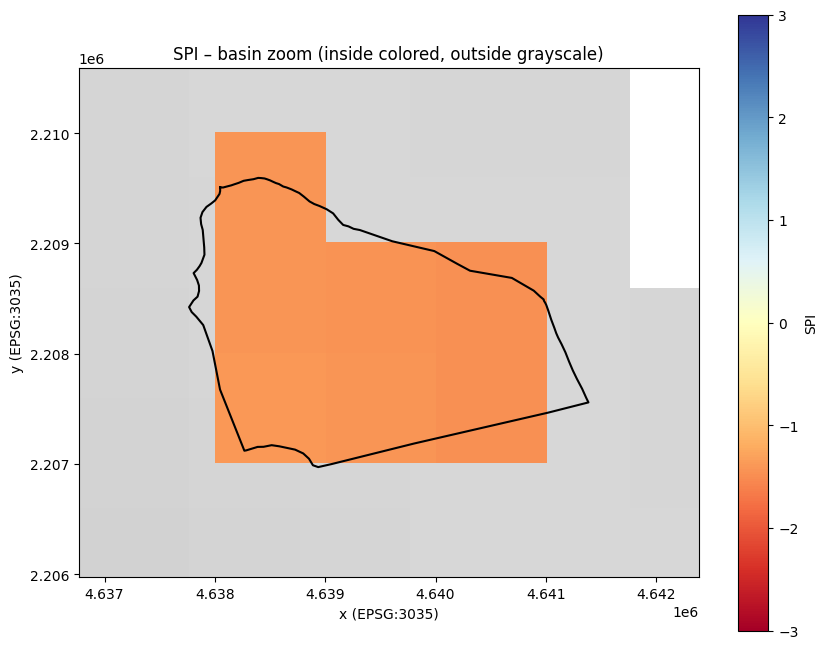

In [43]:
shp_crs = "EPSG:3004"
target_crs = "EPSG:3035"

vmin, vmax = -3, 3
cmap_spi = plt.get_cmap("RdYlBu")   # inside the basin
cmap_out = plt.get_cmap("Greys")    # outside the basin (in the zoomed frame)
# ========================================

# ---------- 1) SHAPEFILE -> Polygon in EPSG:3035 ----------
sf = shapefile.Reader(shp_path)
transformer = Transformer.from_crs(shp_crs, target_crs, always_xy=True)

shape = sf.shapes()[0]  # first polygon
pts_3035 = [transformer.transform(x, y) for x, y in shape.points]
poly = Polygon(pts_3035)
geoms = [mapping(poly)]

minx, miny, maxx, maxy = poly.bounds  # basin bounds (EPSG:3035)

# ======== ZOOM BUFFER (METERS) ========
buffer = 1000  # <--- CHANGE HERE (e.g., 2000, 5000, 10000)
minx -= buffer
miny -= buffer
maxx += buffer
maxy += buffer
# =====================================

# ---------- 2) RASTER: read ONLY the window around the basin (+buffer) ----------
with rasterio.open(file_path) as src:
    print("Raster CRS:", src.crs)

    # raster window covering the expanded bounding box (basin + buffer)
    win = from_bounds(minx, miny, maxx, maxy, transform=src.transform)

    # read the "zoomed" raster
    raster_zoom = src.read(1, window=win)
    transform_zoom = src.window_transform(win)

    # extent of the zoomed raster (EPSG:3035 coordinates)
    h, w = raster_zoom.shape
    xmin, ymax = transform_zoom * (0, 0)
    xmax, ymin = transform_zoom * (w, h)
    extent_zoom = (xmin, xmax, ymin, ymax)

    # clip to the basin (only the inside is colored)
    clipped_img, clipped_transform = mask(src, geoms, crop=True, filled=False)
    clipped = clipped_img[0]

    # extent of the clipped raster
    hc, wc = clipped.shape
    cxmin, cymax = clipped_transform * (0, 0)
    cxmax, cymin = clipped_transform * (wc, hc)
    extent_clip = (cxmin, cxmax, cymin, cymax)

# ---------- 3) PLOT: zoom on the basin (+buffer) ----------
fig, ax = plt.subplots(figsize=(10, 8))

# outside the basin: grayscale, but only within the zoomed frame
ax.imshow(
    raster_zoom,
    cmap=cmap_out,
    vmin=vmin, vmax=vmax,
    extent=extent_zoom,
    origin="upper"
)

# inside the basin: colored
im = ax.imshow(
    clipped,
    cmap=cmap_spi,
    vmin=vmin, vmax=vmax,
    extent=extent_clip,
    origin="upper"
)

# basin outline
x, y = poly.exterior.xy
ax.plot(x, y, color="black", linewidth=1.5)

# controlled zoom (basin + buffer)
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.colorbar(im, ax=ax, label="SPI")
ax.set_title("SPI – basin zoom (inside colored, outside grayscale)")
ax.set_xlabel("x (EPSG:3035)")
ax.set_ylabel("y (EPSG:3035)")

plt.show()


In [45]:
# ================= INPUT =================

anno = 2022

shp_crs = "EPSG:3004"
target_crs = "EPSG:3035"

vmin, vmax = -3, 3
cmap_spi = plt.get_cmap("RdYlBu")   # inside the basin (colored)
#cmap_out = plt.get_cmap("Greys")    # outside the basin (grayscale)
cmap_out = plt.get_cmap("RdYlBu")    
buffer = 5000  # meters: how much context to include in the zoom frame
out_dir = "output_inset_maps"
os.makedirs(out_dir, exist_ok=True)

# Zoom inset size (larger)
inset_w = "55%"
inset_h = "55%"
inset_loc = "lower left"
# ========================================

# ---------- 1) SHAPEFILE -> Polygon in EPSG:3035 (only once) ----------
sf = shapefile.Reader(shp_path)
transformer = Transformer.from_crs(shp_crs, target_crs, always_xy=True)

shape = sf.shapes()[0]  # if you have multiple polygons, tell me and we can merge them
pts_3035 = [transformer.transform(x, y) for x, y in shape.points]
poly = Polygon(pts_3035)
geoms = [mapping(poly)]

poly_x, poly_y = poly.exterior.xy

minx, miny, maxx, maxy = poly.bounds
minx_z, miny_z, maxx_z, maxy_z = (minx - buffer, miny - buffer, maxx + buffer, maxy + buffer)

# ---------- 2) Loop over the 12 months ----------
for mese in range(1, 13):
    mm = f"{mese:02d}"
    file_path = os.path.join(folder, f"SPI03_{anno}_{mm}.asc")

    if not os.path.exists(file_path):
        print(f"[SKIP] File not found: {file_path}")
        continue

    with rasterio.open(file_path) as src:
        # ---- full raster (Italy) ----
        raster_full = src.read(1)
        b = src.bounds
        extent_full = (b.left, b.right, b.bottom, b.top)

        # ---- zoom window (basin + buffer) ----
        win = from_bounds(minx_z, miny_z, maxx_z, maxy_z, transform=src.transform)
        raster_zoom = src.read(1, window=win)
        transform_zoom = src.window_transform(win)

        h, w = raster_zoom.shape
        zxmin, zymax = transform_zoom * (0, 0)
        zxmax, zymin = transform_zoom * (w, h)
        extent_zoom = (zxmin, zxmax, zymin, zymax)

        # ---- basin clip (only the inside is colored) ----
        clipped_img, clipped_transform = mask(src, geoms, crop=True, filled=False)
        clipped = clipped_img[0]  # masked array

        hc, wc = clipped.shape
        cxmin, cymax = clipped_transform * (0, 0)
        cxmax, cymin = clipped_transform * (wc, hc)
        extent_clip = (cxmin, cxmax, cymin, cymax)

    # ---------- 3) FIGURE with inset ----------
    fig, ax = plt.subplots(figsize=(11, 8))

    # Italy in grayscale
    ax.imshow(
        raster_full,
        cmap=cmap_out,
        vmin=vmin, vmax=vmax,
        extent=extent_full,
        origin="upper"
    )

    # basin outline on the main map
    ax.plot(poly_x, poly_y, color="black", linewidth=1.2)

    ax.set_title(f"SPI03 – {anno}-{mm}")
    ax.set_xlabel("x (EPSG:3035)")
    ax.set_ylabel("y (EPSG:3035)")

    # larger inset
    axins = inset_axes(
        ax,
        width=inset_w,
        height=inset_h,
        loc=inset_loc,
        borderpad=1.0
    )

    # grayscale background in the inset (zoom area only)
    axins.imshow(
        raster_zoom,
        cmap=cmap_out,
        vmin=vmin, vmax=vmax,
        extent=extent_zoom,
        origin="upper"
    )

    # colored basin interior in the inset
    im = axins.imshow(
        clipped,
        cmap=cmap_spi,
        vmin=vmin, vmax=vmax,
        extent=extent_clip,
        origin="upper"
    )

    # basin outline in the inset
    axins.plot(poly_x, poly_y, color="black", linewidth=1.2)

    # inset limits = basin + buffer
    axins.set_xlim(minx_z, maxx_z)
    axins.set_ylim(miny_z, maxy_z)

    axins.set_xticks([])
    axins.set_yticks([])

    # rectangle + connectors between the main map and the inset
    mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="black", lw=1.0)

    # colorbar (linked to the colored SPI layer)
    plt.colorbar(im, ax=ax, fraction=0.03, pad=0.02, label="SPI")

    out_png = os.path.join(out_dir, f"SPI03_{anno}_{mm}_Italia_inset_bacino.png")
    plt.savefig(out_png, dpi=250, bbox_inches="tight")
    plt.close(fig)

    print(f"[OK] Saved: {out_png}")


[OK] Saved: output_inset_maps\SPI03_2022_01_Italia_inset_bacino.png
[OK] Saved: output_inset_maps\SPI03_2022_02_Italia_inset_bacino.png
[OK] Saved: output_inset_maps\SPI03_2022_03_Italia_inset_bacino.png
[OK] Saved: output_inset_maps\SPI03_2022_04_Italia_inset_bacino.png
[OK] Saved: output_inset_maps\SPI03_2022_05_Italia_inset_bacino.png
[OK] Saved: output_inset_maps\SPI03_2022_06_Italia_inset_bacino.png
[OK] Saved: output_inset_maps\SPI03_2022_07_Italia_inset_bacino.png
[OK] Saved: output_inset_maps\SPI03_2022_08_Italia_inset_bacino.png
[OK] Saved: output_inset_maps\SPI03_2022_09_Italia_inset_bacino.png
[OK] Saved: output_inset_maps\SPI03_2022_10_Italia_inset_bacino.png
[OK] Saved: output_inset_maps\SPI03_2022_11_Italia_inset_bacino.png
[OK] Saved: output_inset_maps\SPI03_2022_12_Italia_inset_bacino.png


## Create Dataset From bib bang parameter

In [ ]:
# Get the list of all files and subfolders
elementi = os.listdir(folder)

# Filter only files (excluding subfolders)
file = [f for f in elementi if os.path.isfile(os.path.join(folder, f))]
Punti = [[491, 738], [492, 738], [491, 739], [492, 739], [493, 739], [491, 740], [492, 740]]

date = datetime(1952, 1, 1)  # e.g., January 15, 2023
SPI = pd.DataFrame(columns=['Date', 'SPEI'])
k = 0

for i in file:
    with rasterio.open(folder + '\\' + i) as src:
        dataset = src.read(1)  # Extract the first layer (band)

    spi = 0
    for j in Punti:
        spi += dataset[j[0], j[1]]
    spi = spi / 7

    new_row = {
        'Date': date,
        'SPEI': spi
    }
    SPI.loc[k] = new_row
    # SPI = SPI.append(new_row, ignore_index=True)

    k += 1
    date = date + relativedelta(months=1)

SPI = SPI.set_index('Date')
SPI.to_excel('Dataset\\SPEI3.xlsx')
